# PhD course
## Volumetric Modelling

Mathias Bernhard

Digital Building Technologies DBT

[dbt.arch.ethz.ch](http://dbt.arch.ethz.ch)

[bernhard@arch.ethz.ch](mailto:bernhard@arch.ethz.ch)

# Boundary Representation

normal text
<pre>
v -a/2 -b/2 
v  a/2 -b/2
v  a/2  b/2
v -a/2  b/2
</pre>

<pre>
l 0 l
l 1 2
l 2 3
l 3 0
</pre>

<pre>f 0 1 2 3</pre>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

(-4.0, 4.0, -4.0, 4.0)

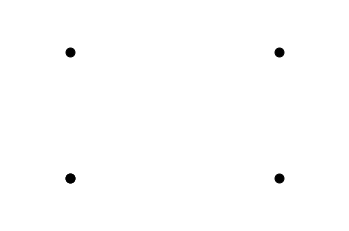

In [3]:
a, b = 5., 3.
v = [[-a/2,-b/2], [a/2,-b/2], [a/2,b/2], [-a/2,b/2], [-a/2,-b/2]]
vx = [c[0] for c in v]
vy = [c[1] for c in v]
plt.scatter(vx,vy, s=80, c='k')
plt.axis('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.axis('off')

(-4.0, 4.0, -4.0, 4.0)

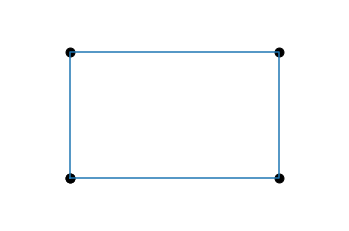

In [4]:
plt.scatter(vx,vy, s=80, c='k')
plt.plot(vx,vy)
plt.axis('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.axis('off')

# Function Representation

<pre>f(x,y) = max(abs(x) - a/2, abs(y) - b/2)</pre>

## sample space at discrete intervals

In [5]:
mr = np.empty((42,42))
for x in range(42):
    for y in range(42):
        cx = -4 + (x/42.)*8
        cy = -4 + (y/42.)*8
        d = max(abs(cx) - a/2, abs(cy) - b/2)
        mr[y,x] = d

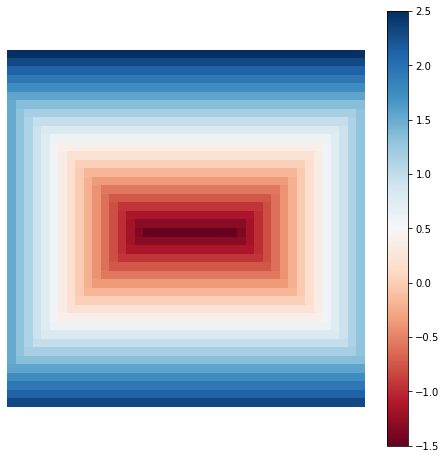

In [6]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mr, cmap='RdBu')
plt.colorbar()

## boundary is where f(x,y)=0

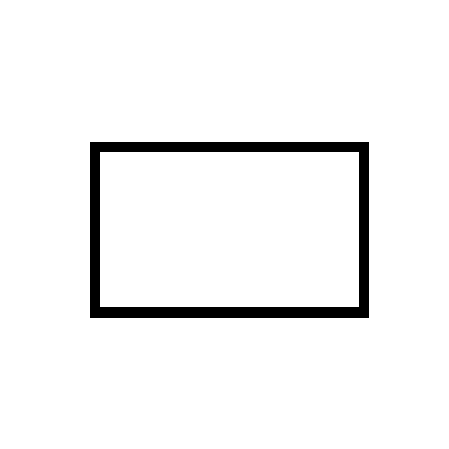

In [7]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(mr)<0.1,cmap='Greys')

## More Primitives: box, sphere, torus, cylinder, cone, ...
### Circle:
<pre>f(x,y) = sqrt(x**2 + y**2) - r</pre>

In [8]:
mc = np.empty((42,42))
for x in range(42):
    for y in range(42):
        cx = -4 + (x/42.)*8
        cy = -4 + (y/42.)*8
        d = math.sqrt(cx**2 + cy**2) - 2.2
        mc[y,x] = d

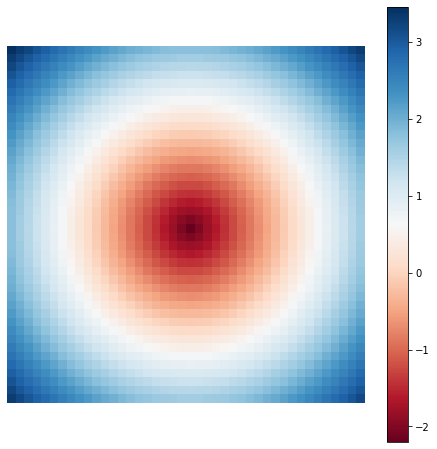

In [9]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mc, cmap='RdBu')
plt.colorbar()

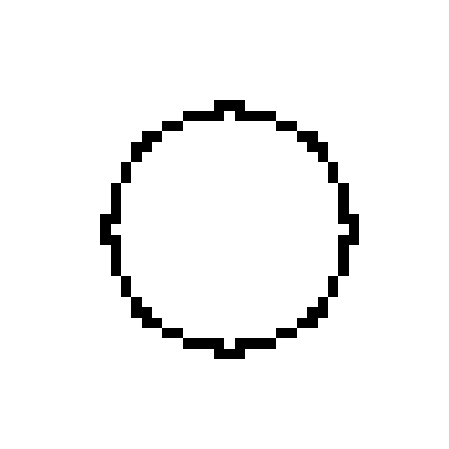

In [10]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(mc)<0.1,cmap='Greys')

## OOP: Primitive Classes

In [77]:
class Rectangle(object):
    def __init__(self, px, py, w, h):
        self.px = px
        self.py = py
        self.w  = w
        self.h  = h
    
    def get_distance(self, x, y):
        max(abs(x-self.px) - self.w/2, abs(y-self.py) - self.h/2)

In [ ]:
class Circle(object):
    def __init__(self, px, py, r):
        self.px = px
        self.py = py
        self.r  = r

## Boolean operations

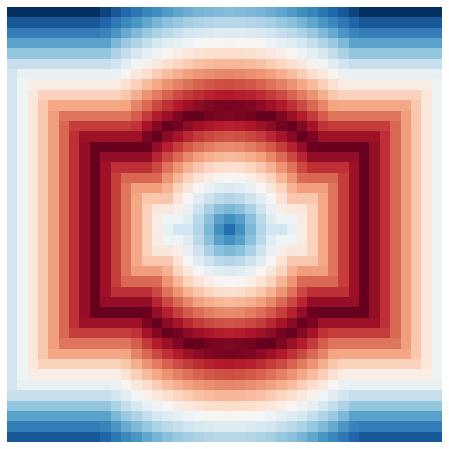

In [11]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.minimum(mr,mc)),cmap='RdBu')

### Union
min(A, B)

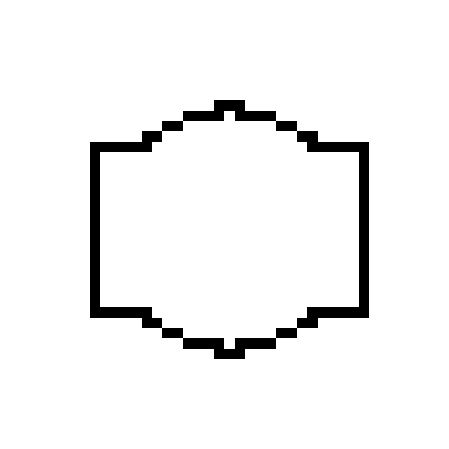

In [12]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.minimum(mr,mc))<0.1,cmap='Greys')

### Intersection
max(A, B)

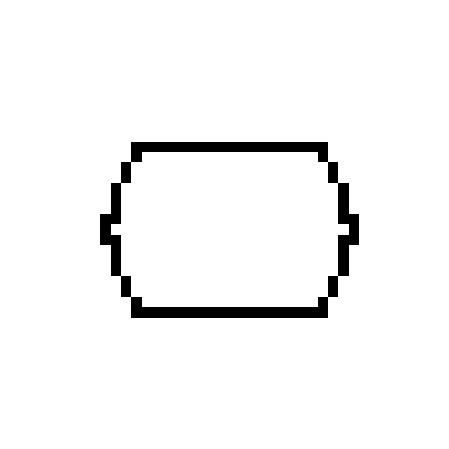

In [13]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.maximum(mr,mc))<0.1,cmap='Greys')

### Subtraction
max(A, -B)

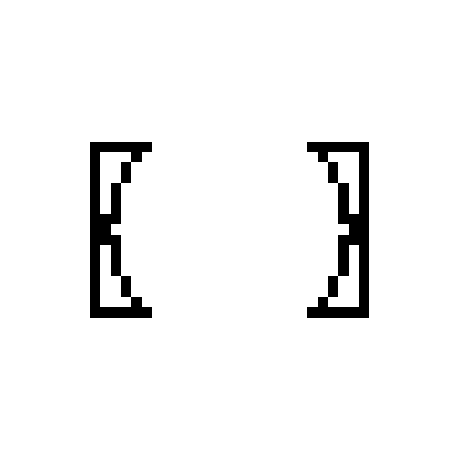

In [14]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.maximum(mr,-mc))<0.1,cmap='Greys')

### Subtraction
max(-A, B)

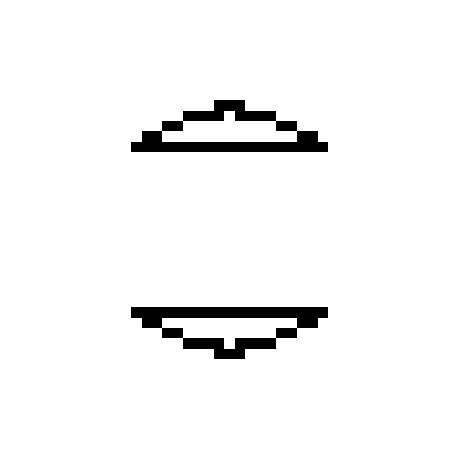

In [15]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.maximum(-mr,mc))<0.1,cmap='Greys')